# **DP 4**

# **Descargamos los datos**

Descargaremos los datos directamente del reto de Kaggle

In [ ]:
!pip install kaggle
!pip install pydicom
from fastai.vision import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 12.8 MB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Subimos el API token de Kaggle (kaggle.json)

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alejandroprez23","key":"764eeb7e41c0979679c1e6a81374a715"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download edemdataproject4

100% 19.1G/19.1G [05:27<00:00, 45.9MB/s]
100% 19.1G/19.1G [05:27<00:00, 62.7MB/s]


In [ ]:
!unzip edemdataproject4.zip

Archive:  edemdataproject4.zip
  inflating: sample_submission.csv   
  inflating: test/1.2.826.0.1.3680043.8.498.60964782211363234805993194732570333546.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.61431034517465531958162912253173088073.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.62775586541135359915919720866789455246.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.66090421685182342980503431575556713055.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.67789794435741873870140624318123072500.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.68178124482700344734822346753000091962.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.69780693352510167266847316539821108215.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.71414931266984795263697005963391289642.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.71446631430051241458602990266940324877.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.72016401052462335241200397926602631772.dcm  
  inflating: test/1.2.826.0.1.3680043.8.4

In [ ]:
!rm edemdataproject4.zip

In [ ]:
ls

kaggle.json  sample_data/  sample_submission.csv  test/  train/  train.csv


In [ ]:
ls train

1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258.dcm
1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125.dcm
1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162.dcm
1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257.dcm
1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016.dcm
1.2.826.0.1.3680043.8.498.10053755320637729867508668285241208441.dcm
1.2.826.0.1.3680043.8.498.10062189329714053601496804394945741428.dcm
1.2.826.0.1.3680043.8.498.10072001800484199846734151421006166369.dcm
1.2.826.0.1.3680043.8.498.10077219503857952412254959562456136784.dcm
1.2.826.0.1.3680043.8.498.10080310665124574896848143784790467773.dcm
1.2.826.0.1.3680043.8.498.10089082474655893722076446314877509447.dcm
1.2.826.0.1.3680043.8.498.10092177056782233773275902757764299181.dcm
1.2.826.0.1.3680043.8.498.10093718510761734264315711288650185574.dcm
1.2.826.0.1.3680043.8.498.10096016393614468374034446437413983650.dcm
1.2.826.0.1.3680043.8.498.10100428

In [ ]:
ls test

1.2.826.0.1.3680043.8.498.60964782211363234805993194732570333546.dcm
1.2.826.0.1.3680043.8.498.61431034517465531958162912253173088073.dcm
1.2.826.0.1.3680043.8.498.62775586541135359915919720866789455246.dcm
1.2.826.0.1.3680043.8.498.66090421685182342980503431575556713055.dcm
1.2.826.0.1.3680043.8.498.67789794435741873870140624318123072500.dcm
1.2.826.0.1.3680043.8.498.68178124482700344734822346753000091962.dcm
1.2.826.0.1.3680043.8.498.69780693352510167266847316539821108215.dcm
1.2.826.0.1.3680043.8.498.71414931266984795263697005963391289642.dcm
1.2.826.0.1.3680043.8.498.71446631430051241458602990266940324877.dcm
1.2.826.0.1.3680043.8.498.72016401052462335241200397926602631772.dcm
1.2.826.0.1.3680043.8.498.72366730326290939562758154525648346058.dcm
1.2.826.0.1.3680043.8.498.73445894389935034071849451944583904490.dcm
1.2.826.0.1.3680043.8.498.74083193005573851060258495550786359123.dcm
1.2.826.0.1.3680043.8.498.74662004268670609746920035230229261250.dcm
1.2.826.0.1.3680043.8.498.74830143

Mostramos una de las imágenes

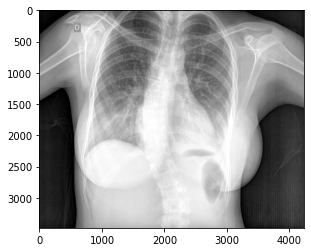

In [ ]:
from pathlib import Path
import pydicom
import numpy as np
from matplotlib import pyplot as plt

def load_image(sample_path):
    ds = pydicom.dcmread(sample_path)
    img = ds.pixel_array
    p01 = np.percentile(img.ravel(), 1)
    p99 = np.percentile(img.ravel(), 99)
    img[img > p99] = p99
    img[img < p01] = p01
    if ds.data_element('PhotometricInterpretation').value == 'MONOCHROME1':
        img = np.invert(img)
    img = (img - img.min()) / (img.max() - img.min())
    return img

sample_path = Path('/content/test/1.2.826.0.1.3680043.8.498.86713234754450346697570307802905763492.dcm')
img = load_image(sample_path)
plt.imshow(img, cmap='gray')

# Cambiamos el formato de las imágenes de DICOM a JPG


**Train**

In [ ]:
import cv2
import os
import pydicom

inputdir = '/content/train/'
outdir = '/content/train_jpg/'
os.mkdir(outdir)

test_list = [ f for f in  os.listdir(inputdir)]

for f in test_list:
    ds = load_image(inputdir + f) # read dicom image
    cv2.imwrite(outdir + f.replace('.dcm','.jpg'),(ds*255).astype('uint8')) # write jpeg image

In [ ]:
!rm -rf train

In [ ]:
!zip -r /content/file.zip /content/train_jpg/

  adding: content/train_jpg/ (stored 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.37666181488793022858518882494618633979.jpg (deflated 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.24377362062409477070465522674137587026.jpg (deflated 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.44735997048413703295756484532477940689.jpg (deflated 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.10873140185372483384104313397133134339.jpg (deflated 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.65508049594021597581136525739723111726.jpg (deflated 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.11955524769280763472642014279467394399.jpg (deflated 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.67688242634068470294792004242095756627.jpg (deflated 1%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.21653274804312754324862594687925832678.jpg (deflated 0%)
  adding: content/train_jpg/1.2.826.0.1.3680043.8.498.10072001800484199

In [ ]:
#Descargamos las imágenes JPG

from google.colab import files
files.download("/content/file.zip")

**Test**

In [ ]:
import cv2
import os
import pydicom

inputdir = '/content/test/'
outdir = '/content/test_jpg/'
os.mkdir(outdir)

test_list = [ f for f in  os.listdir(inputdir)]

for f in test_list:
    ds = load_image(inputdir + f) # read dicom image
    cv2.imwrite(outdir + f.replace('.dcm','.jpg'),(ds*255).astype('uint8')) # write jpeg image

In [ ]:
!rm -rf test

In [ ]:
#Descargamos las imágenes JPG
!zip -r /content/file_test.zip /content/test_jpg/
from google.colab import files
files.download("/content/file_test.zip")

  adding: content/test_jpg/ (stored 0%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.89464178623477682032826898567676520965.jpg (deflated 0%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.88805143461424536216618620186118636709.jpg (deflated 0%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.98728424991502738683495611458161933905.jpg (deflated 0%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.76482195481290376937939274201235029927.jpg (deflated 1%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.83870739165993064101979563581809238327.jpg (deflated 1%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.80533585890806318160595000524214742843.jpg (deflated 0%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.85768051534448835576877567773398478895.jpg (deflated 0%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.90240400296093633201761059427668477066.jpg (deflated 0%)
  adding: content/test_jpg/1.2.826.0.1.3680043.8.498.766831129570772038950393408

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>